# Introduction

Quality sleep is essential for overall well-being, and understanding the factors affecting sleep health offers valuable insights for improving sleep patterns. This article analyzes a dataset on sleep health and lifestyle, unveiling interesting relationships between sleep duration, physical activity, stress, and sleep quality. The subsequent guide breaks down these findings, offering practical implications for better sleep habits.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [16]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


# Preprocessing and Exploratory Data Analysis

In [17]:
df.isna().sum()/len(df)*100

Person ID                   0.00000
Gender                      0.00000
Age                         0.00000
Occupation                  0.00000
Sleep Duration              0.00000
Quality of Sleep            0.00000
Physical Activity Level     0.00000
Stress Level                0.00000
BMI Category                0.00000
Blood Pressure              0.00000
Heart Rate                  0.00000
Daily Steps                 0.00000
Sleep Disorder             58.55615
dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

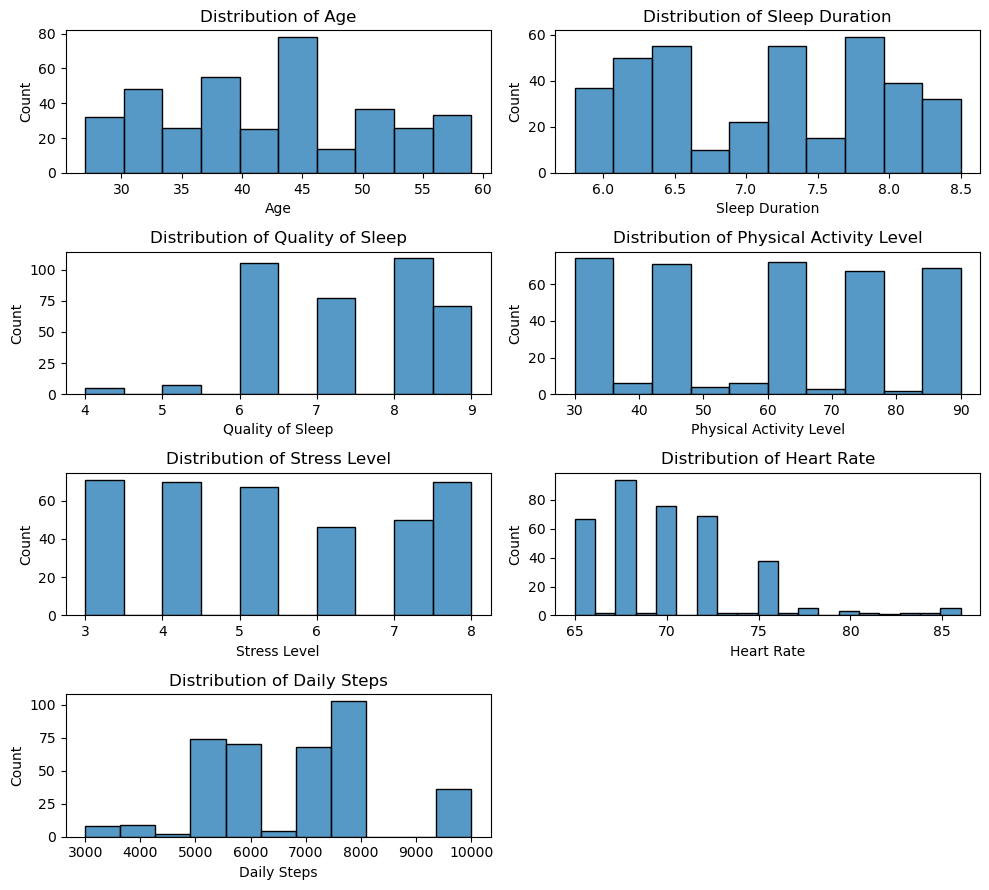

In [18]:
plt.figure(figsize=(10, 9))

plt.subplot(4, 2, 1)
sns.histplot(x=df['Age'], kde=False)
plt.title('Distribution of Age')

plt.subplot(4, 2, 2)
sns.histplot(x=df['Sleep Duration'], kde=False)
plt.title('Distribution of Sleep Duration')

plt.subplot(4, 2, 3)
sns.histplot(x=df['Quality of Sleep'], kde=False)
plt.title('Distribution of Quality of Sleep')

plt.subplot(4, 2, 4)
sns.histplot(x=df['Physical Activity Level'], kde=False)
plt.title('Distribution of Physical Activity Level')

plt.subplot(4, 2, 5)
sns.histplot(x=df['Stress Level'], kde=False)
plt.title('Distribution of Stress Level')

plt.subplot(4, 2, 6)
sns.histplot(x=df['Heart Rate'], kde=False)
plt.title('Distribution of Heart Rate')

plt.subplot(4, 2, 7)
sns.histplot(x=df['Daily Steps'], kde=False)
plt.title('Distribution of Daily Steps')

plt.tight_layout()
plt.show()

## Gender Differences in Quality of Sleep

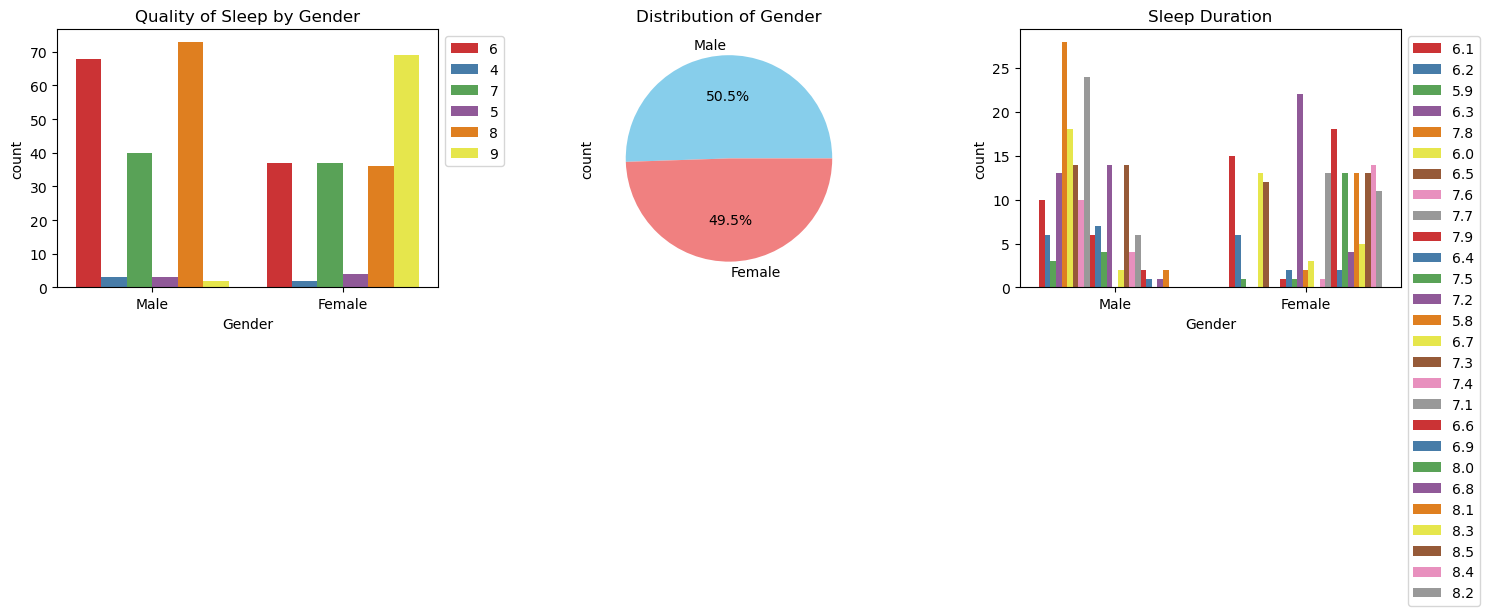

In [19]:
# Ensure the relevant columns are cast to string
df['Gender'] = df['Gender'].astype(str)
df['Quality of Sleep'] = df['Quality of Sleep'].astype(str)
df['Sleep Duration'] = df['Sleep Duration'].astype(str)

# Create subplots
figure, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the count plot on the first subplot
sns.countplot(x='Gender', hue='Quality of Sleep', palette='Set1', data=df, ax=axes[0])
axes[0].set_title('Quality of Sleep by Gender')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Plot the pie chart on the second subplot
df['Gender'].value_counts().plot.pie(ax=axes[1], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
axes[1].set_title('Distribution of Gender')

# Plot the count plot on the third subplot
sns.countplot(x='Gender', hue='Sleep Duration', palette='Set1', data=df, ax=axes[2])
axes[2].set_title('Sleep Duration')
axes[2].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

The first graph shows how sleep quality differs between genders, with labels explaining the categories of "Quality of Sleep." The second graph gives a quick look at how many males and females are in the dataset. The third graph displays how sleep duration is spread out among genders, suggesting that males might have less sleep compared to females.

## Comparison of the Quality of sleep by Distribution of Age Groups

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


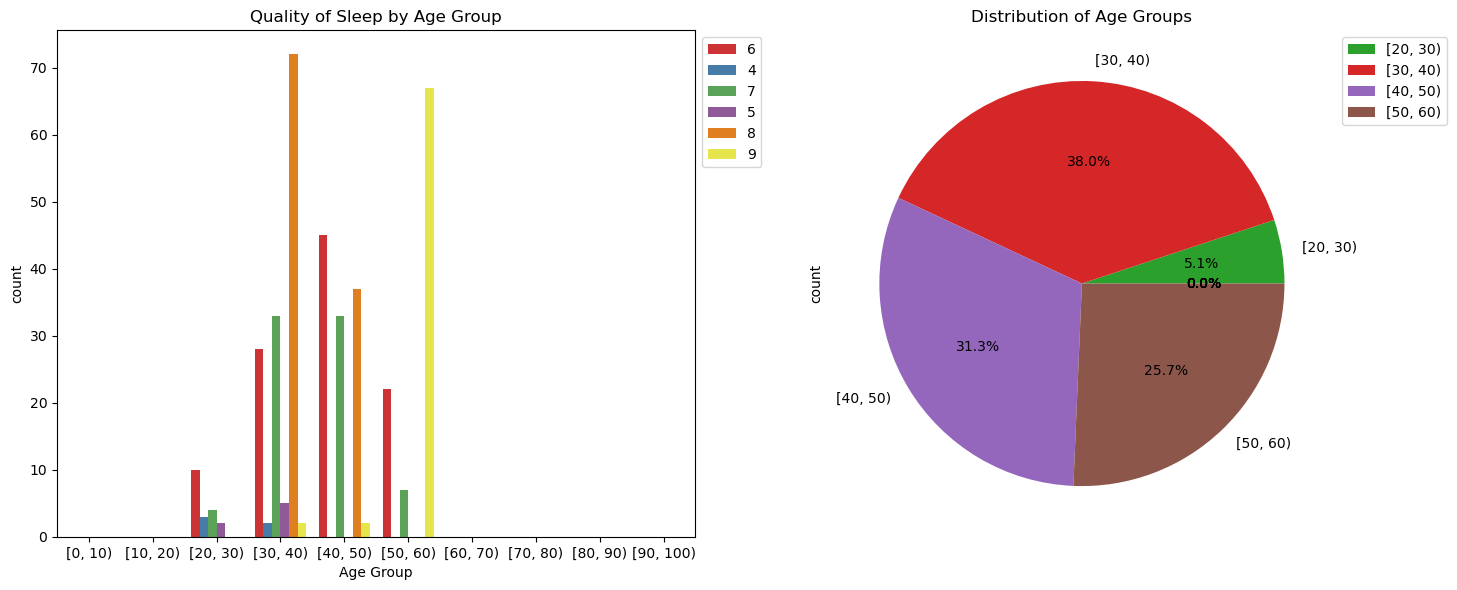

In [20]:
bin_edges = list(range(0, 101, 10))  # Adjust the range and step based on your preference
df['Age Group'] = pd.cut(df['Age'], bins=bin_edges, right=False)

# Create a figure with two subplots side by side
figure, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the count plot on the first subplot
sns.countplot(x='Age Group', hue='Quality of Sleep', palette='Set1', data=df, ax=axes[0])
# axes[0].set_yscale('log')  # Set y-axis scale to logarithmic
axes[0].set_title('Quality of Sleep by Age Group')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Plot the pie chart on the second subplot
df['Age Group'].value_counts().sort_index().plot.pie(ax=axes[1], autopct='%1.1f%%')
axes[1].set_title('Distribution of Age Groups')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Drop the 'Age Group' column if you don't need it for further analysis
df = df.drop('Age Group', axis=1)

As in the graph above age 30 to 40 is the ideal time to have a quality sleep because of less responsibilities in life.

## Sleep Analysis by Occupation

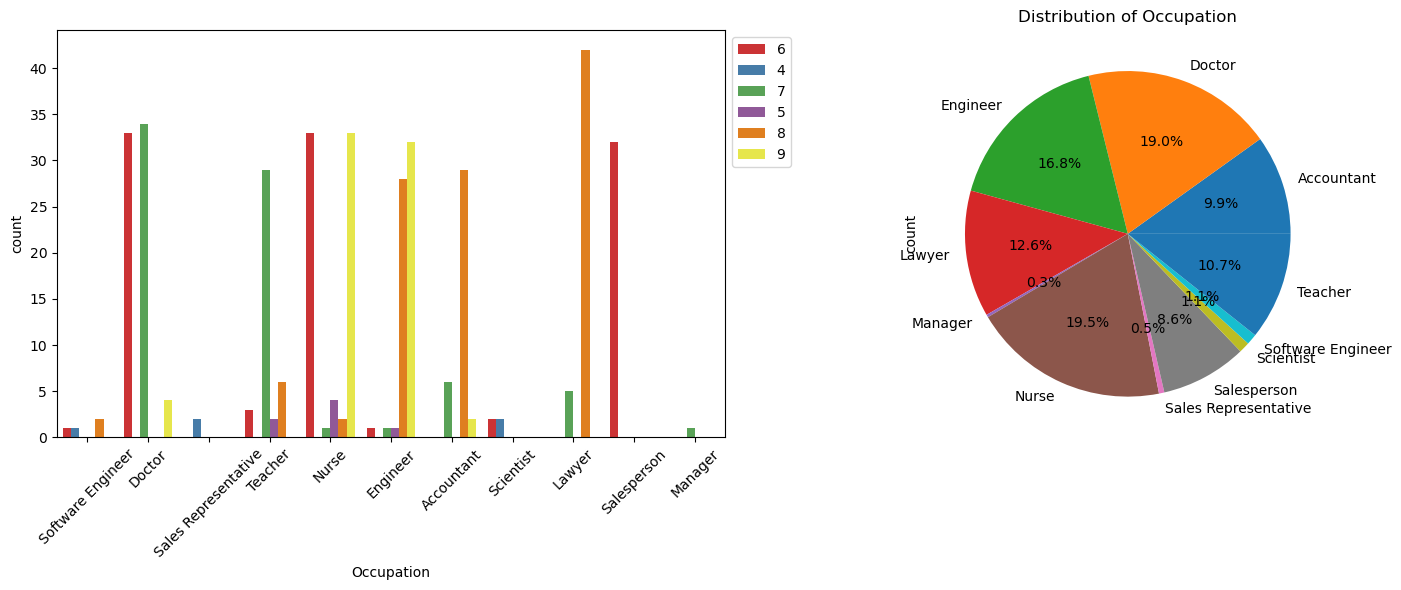

In [21]:
figure, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the count plot on the first subplot
sns.countplot(x='Occupation', hue='Quality of Sleep', palette='Set1', data=df, ax=axes[0])
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis ticks

df['Occupation'].value_counts().sort_index().plot.pie(ax=axes[1], autopct='%1.1f%%')
axes[1].set_title('Distribution of Occupation')

plt.tight_layout()

## Relationship between occupation and sleep duration

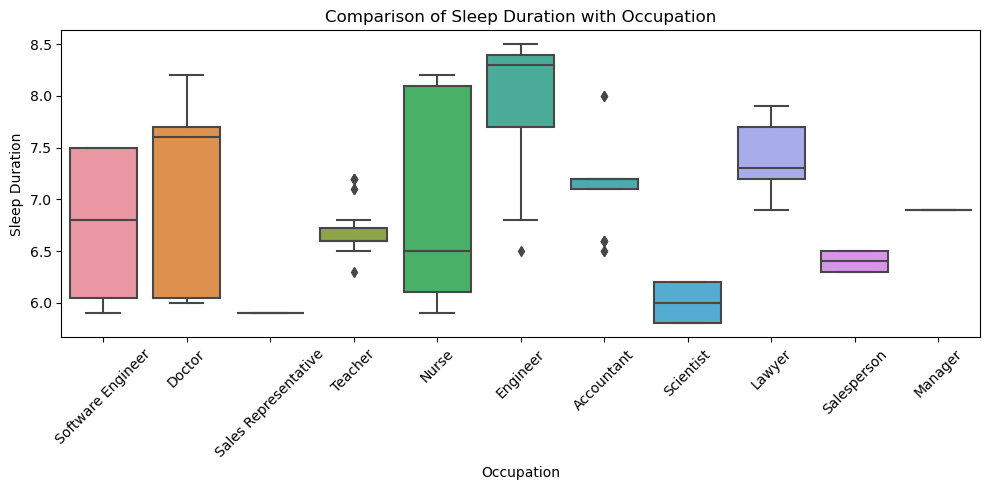

In [22]:
# Convert 'Sleep Duration' to numeric, if it's not already
df['Sleep Duration'] = pd.to_numeric(df['Sleep Duration'], errors='coerce')

# Now plot the boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x='Occupation', y='Sleep Duration', data=df)
plt.title('Comparison of Sleep Duration with Occupation')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The correlation between occupation and sleep duration, it was expectedly found that professions like software engineers and doctors had shorter sleep durations than other occupations. We delve into potential implications and factors influencing varying sleep durations across different professions.